### Introduction

In the real estate market, homeowners often seek ways to maximize their property values, whether preparing to sell or enhancing their investment. This project aims to provide insights on home valuation and how various renovations can increase their estimated value. By leveraging data on homes in King County, we aim to help homeowners make informed decisions regarding their property.

### Problem Statement

Homeowners and real estate agents often face the challenge of accurately predicting home values and identifying which renovations will yield the highest return on investment. Inaccurate valuations can affect home sales and lead to significant losses for both buyers and sellers. Uninformed renovation decisions can result in unnecessary expenditures without a corresponding increase in property value. For a real estate agency that helps homeowners buy and sell homes, providing accurate home valuations and precise advice on effective renovations is crucial.

### Objectives:
1. **Develop a model that accurately predicts the value of a house based on its features.**
    - Investigate the most important features in homes to create an accurate model for estimating home value.
2. **Explore and quantify the relationship between renovations and property value and refine the model based on the results.**
    - Determine whether renovations affect home prices. If a relationship exists, quantify it and refine the model to improve accuracy.
3. **Offer tailored recommendations to homeowners based on their property characteristics and market conditions.**
    - Provide homeowners with accurate property valuations and advise on whether renovations would be a worthwhile investment if they intend to sell.

By analyzing housing data, this project will develop a predictive model to guide homeowners in making strategic renovation investments that enhance property value.


# Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Data loading, and inspection

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df. columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



# EDA And Data Cleaning

In [6]:
df.shape

(21597, 21)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 12 columns (or variables) in the DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#drop unnecessary columns
df = df.drop(columns= ['date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'])

In [9]:
#drop duplicates
df = df.drop_duplicates(subset= ['id'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  int64  
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  float64
 4   sqft_living   21420 non-null  int64  
 5   sqft_lot      21420 non-null  int64  
 6   floors        21420 non-null  float64
 7   waterfront    19067 non-null  float64
 8   condition     21420 non-null  int64  
 9   grade         21420 non-null  int64  
 10  yr_built      21420 non-null  int64  
 11  yr_renovated  17616 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


In [10]:
#checking for nans
df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2353
condition          0
grade              0
yr_built           0
yr_renovated    3804
dtype: int64

In [12]:
#percentage of nans

percentage_nan = 3804/21420
percentage_nan

0.17759103641456583

filling nans with zeros, the assumption being that they have no water fronts and/or they have not been renovated, This because the percentage of nans for yr_renovated is almost  a significant 20% and may affect our analysis if we drop

In [21]:
#filling nans with zero
df = df.fillna(0.0)

Rechecking for null values

In [27]:
df.isna().sum()

id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

next we convert waterfront and yr_renovated to boolean values, and give them suitable names

In [39]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df['waterfront'] = df['waterfront'].apply(lambda x: x > 0)
# Replace values in column 'yr_renovated' with booleans based on a condition
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x > 0)
df = df.rename(columns={'waterfront': 'has_waterfont', 'yr_renovated': 'is_renovated'})

In [40]:
df.sample(n=20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfont,condition,grade,is_renovated,age
17338,3336000170,335000.0,4,1.00,1480,6500,1.5,False,4,7,False,110
2372,1330900570,575000.0,4,2.50,2520,35636,2.0,False,3,8,False,44
8358,7340600845,185000.0,4,1.00,1380,6700,1.0,False,3,7,False,96
7807,985001321,291000.0,4,1.00,1590,24330,1.5,False,3,6,False,82
12312,7387500335,280000.0,3,1.00,980,7480,1.0,False,3,6,False,76
13555,2460700650,280000.0,3,1.75,1360,6603,1.0,False,4,7,False,43
1952,1562200240,550000.0,3,2.25,2160,15360,1.0,False,3,8,True,59
19014,164000261,700000.0,4,3.25,2780,7875,2.0,False,3,9,False,18
11533,5104520550,357500.0,3,3.50,2080,5100,2.0,False,3,8,False,20
13148,5101402428,790000.0,4,2.50,2560,12760,1.0,False,4,7,False,75


replace yr_built with age

In [34]:
df['age'] = 2024 - df['yr_built']
df = df.drop(columns= ['yr_built'])
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,3.410784,7.662792,52.907003
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.650035,1.171971,29.387141
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,9.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,27.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,3.000000,7.000000,49.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,4.000000,8.000000,72.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,124.000000


## Pair plot

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


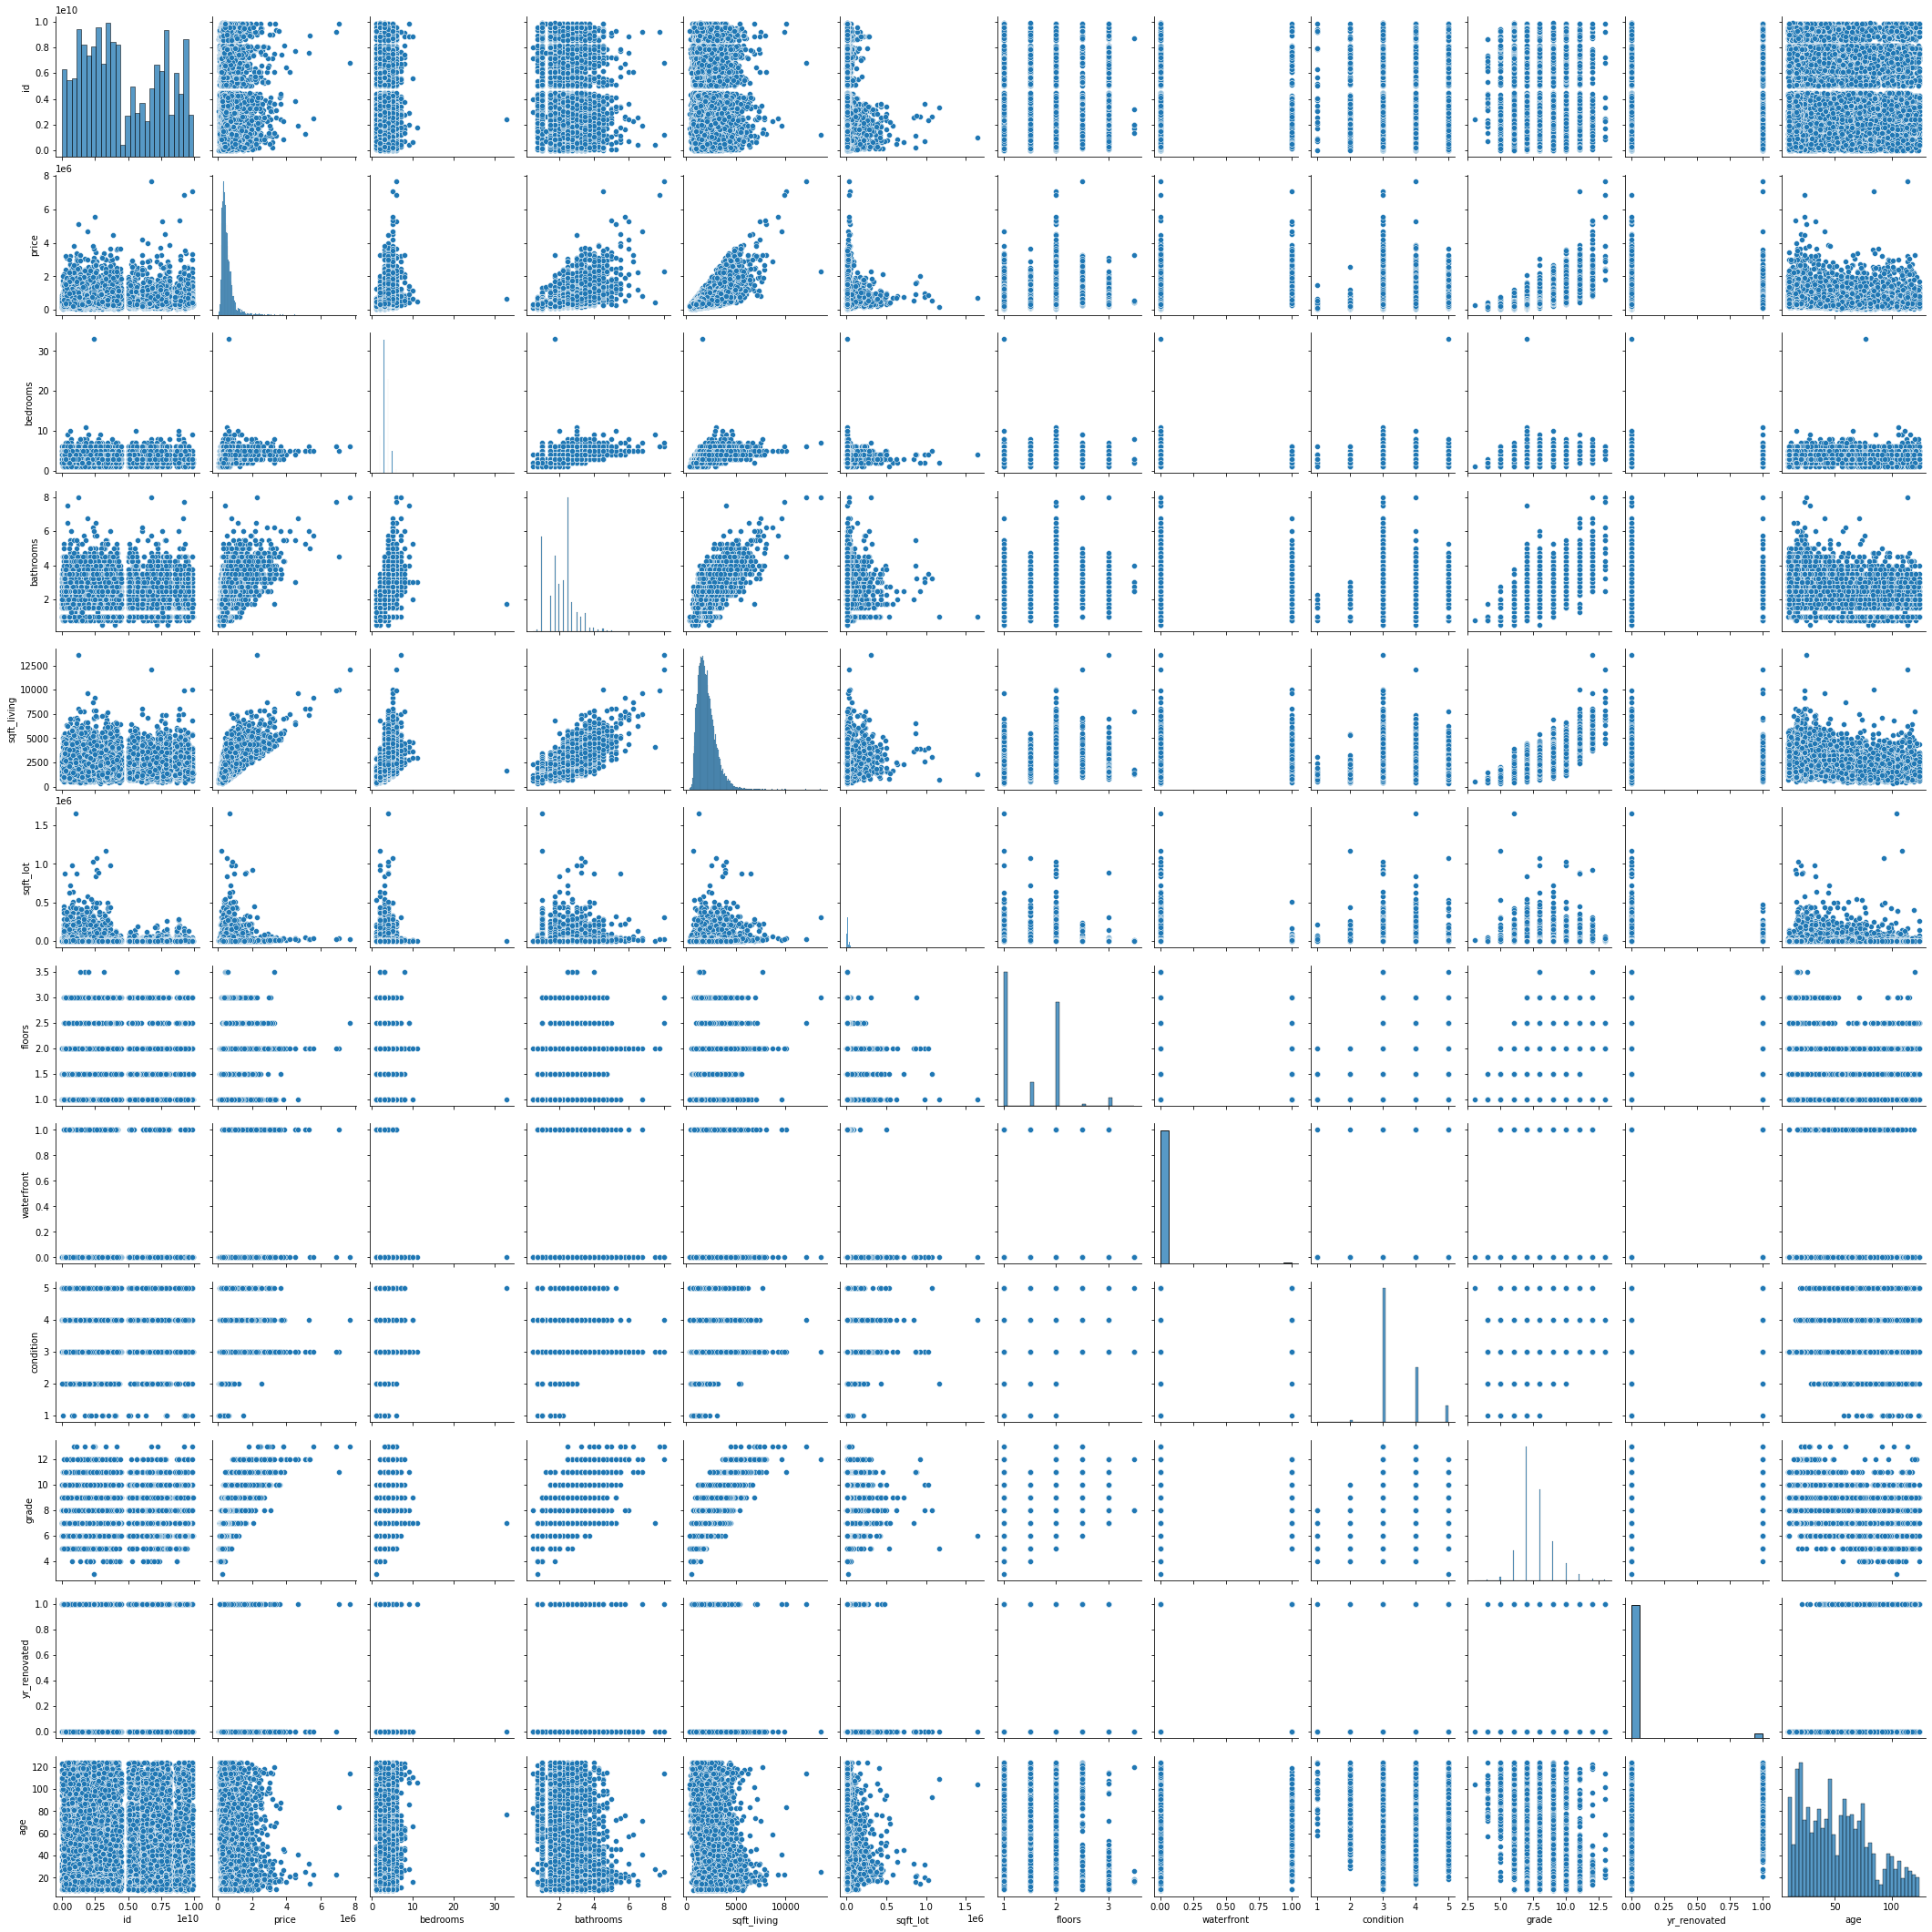

In [35]:
sns.pairplot(data=df)

## Correlation HeatMap

<AxesSubplot:>

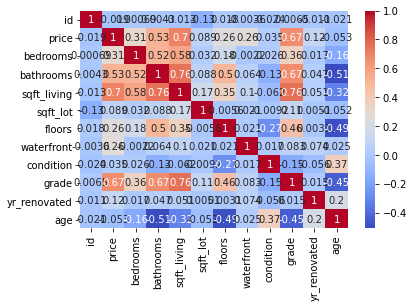

In [37]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [41]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfont,condition,grade,is_renovated,age
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.003628,-0.024300,0.006470,-0.010864,-0.021171
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.264898,0.034779,0.668020,0.118179,-0.052906
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.025893,0.357988,0.017204,-0.155241
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,-0.129362,0.665587,0.047259,-0.506252
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.050623,-0.316646
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.005105,-0.052312
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.003063,-0.488935
has_waterfont,-0.003628,0.264898,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,0.074429,0.024842
condition,-0.024300,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.055836,0.365129
grade,0.006470,0.668020,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.015385,-0.446235


# Feature Selection

In [42]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'has_waterfont', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

In [43]:
# top predictors
# sqft_living, grade, bathrooms, bedrooms, has_waterfront,floors,is_renovated
# we shall also take waterfront and yr_renovated along with them for analysis
# they exhibit some multi collinearity but lets test them out
 # select most important features
df_selected = df[['price','sqft_living','grade','bathrooms','bedrooms','has_waterfont','floors','is_renovated']]
df_selected.head()

,price,sqft_living,grade,bathrooms,bedrooms,has_waterfont,floors,is_renovated
0,221900.0,1180,7,1.00,3,False,1.0,False
1,538000.0,2570,7,2.25,3,False,2.0,True
2,180000.0,770,6,1.00,2,False,1.0,False
3,604000.0,1960,7,3.00,4,False,1.0,False
4,510000.0,1680,8,2.00,3,False,1.0,False


## Add justification later... after modeling

explanation...

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


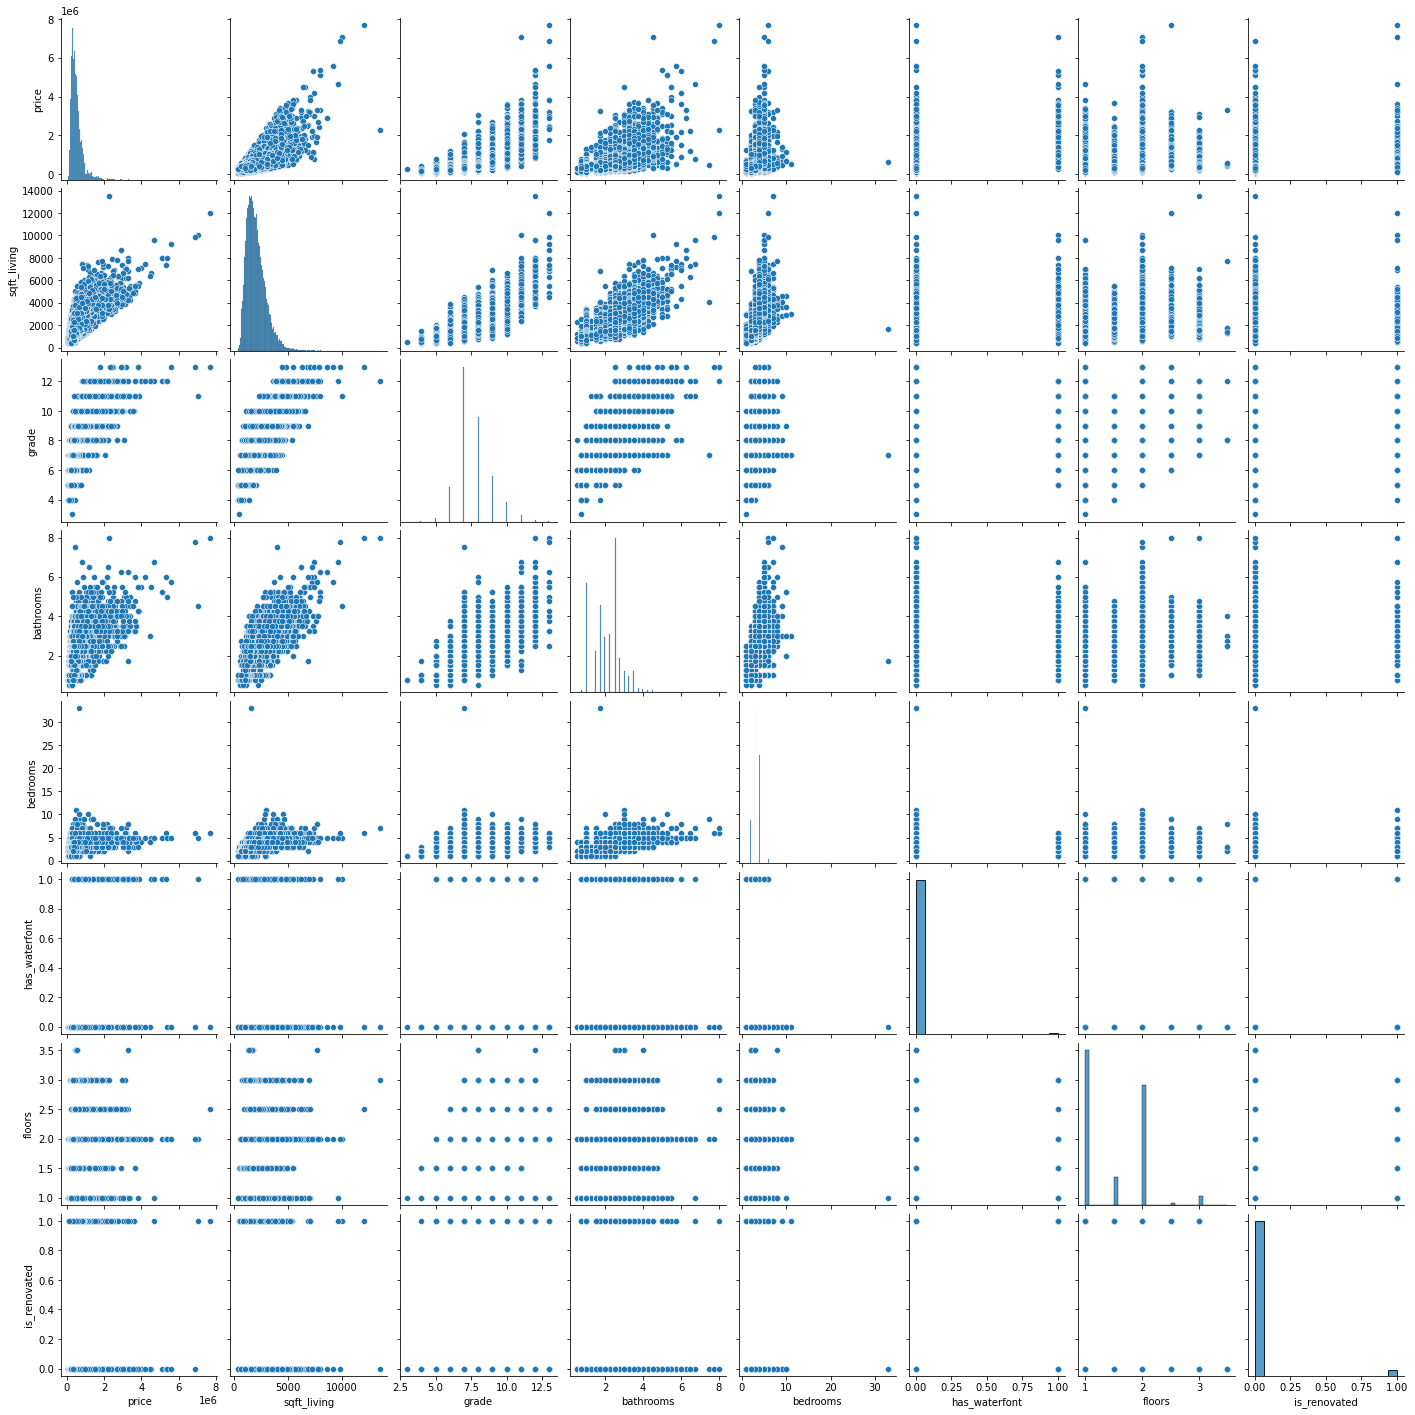

In [44]:
sns.pairplot(data=df_selected)

## Data Cleaning

Checking for outliers

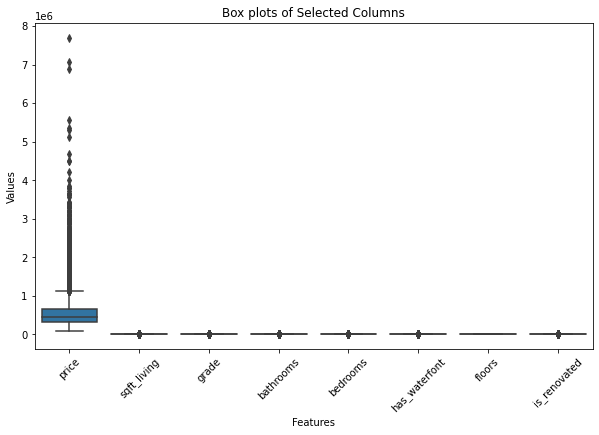

In [45]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [46]:
df_selected.describe()

,price,sqft_living,grade,bathrooms,bedrooms,floors
count,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,2083.132633,7.662792,2.118429,3.373950,1.495985
std,3.679311e+05,918.808412,1.171971,0.768720,0.925405,0.540081
min,7.800000e+04,370.000000,3.000000,0.500000,1.000000,1.000000
25%,3.225000e+05,1430.000000,7.000000,1.750000,3.000000,1.000000
50%,4.500000e+05,1920.000000,7.000000,2.250000,3.000000,1.500000
75%,6.450000e+05,2550.000000,8.000000,2.500000,4.000000,2.000000
max,7.700000e+06,13540.000000,13.000000,8.000000,33.000000,3.500000


In [18]:
#dropping outliers in price and sqft_living, since this are mostly crucial 
#other features dont have much variability

In [47]:
df_selected_outliers = df_selected[['price','sqft_living']]
# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df_selected.index[outliers]

## Remove the outliers 

In [48]:
# droping all columns with outliers 
df_selected = df_selected.drop(outlier_indices)


In [58]:
df_selected.describe()


,price,sqft_living,grade,bathrooms,bedrooms,floors
count,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000
mean,4.737215e+05,1954.195870,7.516646,2.041801,3.321075,1.473999
std,2.051190e+05,732.982251,1.014726,0.696555,0.900340,0.536939
min,7.800000e+04,370.000000,3.000000,0.500000,1.000000,1.000000
25%,3.150000e+05,1400.000000,7.000000,1.500000,3.000000,1.000000
50%,4.350000e+05,1850.000000,7.000000,2.000000,3.000000,1.000000
75%,5.999500e+05,2420.000000,8.000000,2.500000,4.000000,2.000000
max,1.120000e+06,4230.000000,12.000000,7.500000,33.000000,3.500000


## Check for Duplicates

In [59]:
df.duplicated().sum()

0

# Data analysis

Analysis 1: Does renovation of a house affect its sale price? If so, by how much

For this we'll create 2 models, one with the renovations and its control, to try an establish whether there is indeed a link

## Analysis 1, (Predicting Price of houses with and without renovations)

In [21]:
df_selected.head()

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
0,221900.0,7,1.00,3,1.0,1180,0.0,NaN
1,538000.0,7,2.25,3,2.0,2570,1991.0,0.0
2,180000.0,6,1.00,2,1.0,770,NaN,0.0
3,604000.0,7,3.00,4,1.0,1960,0.0,0.0
4,510000.0,8,2.00,3,1.0,1680,0.0,0.0


In [22]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20095 non-null  float64
 1   grade         20095 non-null  int64  
 2   bathrooms     20095 non-null  float64
 3   bedrooms      20095 non-null  int64  
 4   floors        20095 non-null  float64
 5   sqft_living   20095 non-null  int64  
 6   yr_renovated  16531 non-null  float64
 7   waterfront    17868 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


In [23]:
df_selected.describe()

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
count,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,16531.000000,17868.000000
mean,4.737215e+05,7.516646,2.041801,3.321075,1.473999,1954.195870,74.360111,0.002798
std,2.051190e+05,1.014726,0.696555,0.900340,0.536939,732.982251,377.990533,0.052826
min,7.800000e+04,3.000000,0.500000,1.000000,1.000000,370.000000,0.000000,0.000000
25%,3.150000e+05,7.000000,1.500000,3.000000,1.000000,1400.000000,0.000000,0.000000
50%,4.350000e+05,7.000000,2.000000,3.000000,1.000000,1850.000000,0.000000,0.000000
75%,5.999500e+05,8.000000,2.500000,4.000000,2.000000,2420.000000,0.000000,0.000000
max,1.120000e+06,12.000000,7.500000,33.000000,3.500000,4230.000000,2015.000000,1.000000


In [24]:
#we create new dataframe for our analysis
df_renovation = df_selected

In [25]:
#drop nans in column of interest, drop waterfront. not necessary
df_renovation = df_renovation.dropna(subset= ['yr_renovated'])
df_renovation = df_renovation.drop(columns= ['waterfront'])


In [26]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df_renovation['yr_renovated'] = df_renovation['yr_renovated'].apply(lambda x: x > 0)

In [27]:
df_renovation

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated
0,221900.0,7,1.00,3,1.0,1180,False
1,538000.0,7,2.25,3,2.0,2570,True
3,604000.0,7,3.00,4,1.0,1960,False
4,510000.0,8,2.00,3,1.0,1680,False
6,257500.0,7,2.25,3,2.0,1715,False
...,...,...,...,...,...,...,...
21592,360000.0,8,2.50,3,3.0,1530,False
21593,400000.0,8,2.50,4,2.0,2310,False
21594,402101.0,7,0.75,2,2.0,1020,False
21595,400000.0,8,2.50,3,2.0,1600,False


In [28]:
# split into 2 dataframes, one with renovated houses, the other without
df_renovation_with = df_renovation[df_renovation['yr_renovated']== True]
df_renovation_without =  df_renovation[df_renovation['yr_renovated']== False]

In [29]:
df_renovation_with.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 1 to 20946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         616 non-null    float64
 1   grade         616 non-null    int64  
 2   bathrooms     616 non-null    float64
 3   bedrooms      616 non-null    int64  
 4   floors        616 non-null    float64
 5   sqft_living   616 non-null    int64  
 6   yr_renovated  616 non-null    bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 34.3 KB


In [30]:
df_renovation_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15915 non-null  float64
 1   grade         15915 non-null  int64  
 2   bathrooms     15915 non-null  float64
 3   bedrooms      15915 non-null  int64  
 4   floors        15915 non-null  float64
 5   sqft_living   15915 non-null  int64  
 6   yr_renovated  15915 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 885.9 KB


# Data Preparations


We shall now model both dataframes and compare

## Model 1 with renovations

In [31]:
x_m1 = df_renovation_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m1.head()

y_m1= df_renovation_with['price']
y_m1.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m1,y_m1,test_size=0.2,random_state=42)


#modeling

model1 = LinearRegression()
model1.fit(x_train,y_train)

y_pred_m1 = model1.predict(x_test)

df_model1= pd.DataFrame({"true":y_test,"pred":y_pred_m1})
df_model1.head()

mse = mean_squared_error(y_test,y_pred_m1)
mae = mean_absolute_error(y_test,y_pred_m1)
r2  = r2_score(y_test,y_pred_m1)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 24297152228.797108
mae 120935.7947050662
R2 0.5580648275105633


## Model 2 without renovations

In [32]:
x_m2 = df_renovation_without[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m2.head()

y_m2= df_renovation_without['price']
y_m2.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m2,y_m2,test_size=0.2,random_state=42)


#modeling

model2 = LinearRegression()
model2.fit(x_train,y_train)

y_pred_m2 = model2.predict(x_test)

df_model2= pd.DataFrame({"true":y_test,"pred":y_pred_m2})
df_model2.head()

mse = mean_squared_error(y_test,y_pred_m2)
mae = mean_absolute_error(y_test,y_pred_m2)
r2  = r2_score(y_test,y_pred_m2)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 22335155884.640453
mae 118147.92520682073
R2 0.45462731521314037


## Analysis 2, (Predicting Price of houses with and without waterfronts)

Question: Does prescence of a waterfront affect value of a house, and if so by how much?

Similarly, we shall create 2 models , one with ,and another without waterfronts

In [33]:
#we create new dataframe for our analysis
df_waterfront = df_selected

In [34]:
df_waterfront


,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
0,221900.0,7,1.00,3,1.0,1180,0.0,NaN
1,538000.0,7,2.25,3,2.0,2570,1991.0,0.0
2,180000.0,6,1.00,2,1.0,770,NaN,0.0
3,604000.0,7,3.00,4,1.0,1960,0.0,0.0
4,510000.0,8,2.00,3,1.0,1680,0.0,0.0
...,...,...,...,...,...,...,...,...
21592,360000.0,8,2.50,3,3.0,1530,0.0,0.0
21593,400000.0,8,2.50,4,2.0,2310,0.0,0.0
21594,402101.0,7,0.75,2,2.0,1020,0.0,0.0
21595,400000.0,8,2.50,3,2.0,1600,0.0,NaN


In [35]:
#drop nans in column of interest, drop yr_renovated. not necessary## Model 1 with renovations
df_waterfront = df_waterfront.dropna(subset= ['waterfront'])
df_waterfront = df_waterfront.drop(columns= ['yr_renovated'])
df_waterfront.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17868 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17868 non-null  float64
 1   grade        17868 non-null  int64  
 2   bathrooms    17868 non-null  float64
 3   bedrooms     17868 non-null  int64  
 4   floors       17868 non-null  float64
 5   sqft_living  17868 non-null  int64  
 6   waterfront   17868 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [36]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df_waterfront['waterfront'] = df_waterfront['waterfront'].apply(lambda x: x > 0)
df_waterfront.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17868 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17868 non-null  float64
 1   grade        17868 non-null  int64  
 2   bathrooms    17868 non-null  float64
 3   bedrooms     17868 non-null  int64  
 4   floors       17868 non-null  float64
 5   sqft_living  17868 non-null  int64  
 6   waterfront   17868 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 994.6 KB


In [37]:
# split into 2 dataframes, one with renovated houses, the other without
df_waterfront_with = df_waterfront[df_waterfront['waterfront']== True]
df_waterfront_without =  df_waterfront[df_waterfront['waterfront']== False]

In [38]:
df_waterfront_with.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 230 to 19955
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        50 non-null     float64
 1   grade        50 non-null     int64  
 2   bathrooms    50 non-null     float64
 3   bedrooms     50 non-null     int64  
 4   floors       50 non-null     float64
 5   sqft_living  50 non-null     int64  
 6   waterfront   50 non-null     bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 2.8 KB


In [39]:
df_waterfront_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17818 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17818 non-null  float64
 1   grade        17818 non-null  int64  
 2   bathrooms    17818 non-null  float64
 3   bedrooms     17818 non-null  int64  
 4   floors       17818 non-null  float64
 5   sqft_living  17818 non-null  int64  
 6   waterfront   17818 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 991.8 KB


# Data Preparations


## Model 3, with waterfronts



In [40]:
x_m3 = df_waterfront_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m3.head()

y_m3= df_waterfront_with['price']
y_m3.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m3,y_m3,test_size=0.2,random_state=42)


#modeling

model3 = LinearRegression()
model3.fit(x_train,y_train)

y_pred_m3 = model1.predict(x_test)

df_model3= pd.DataFrame({"true":y_test,"pred":y_pred_m3})
df_model3.head()

mse = mean_squared_error(y_test,y_pred_m3)
mae = mean_absolute_error(y_test,y_pred_m3)
r2  = r2_score(y_test,y_pred_m3)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 66705803196.02553
mae 193715.6556667566
R2 -1.4167753527759532


In [41]:
#Very inaccurate, R squared value negative


## Model 4, without waterfronts



In [42]:
x_m4 = df_waterfront_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m4.head()

y_m4= df_waterfront_with['price']
y_m4.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m4,y_m4,test_size=0.2,random_state=42)


#modeling

model4 = LinearRegression()
model4.fit(x_train,y_train)

y_pred_m4 = model4.predict(x_test)

df_model4= pd.DataFrame({"true":y_test,"pred":y_pred_m4})
df_model4.head()

mse = mean_squared_error(y_test,y_pred_m4)
mae = mean_absolute_error(y_test,y_pred_m4)
r2  = r2_score(y_test,y_pred_m4)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 14431032453.497015
mae 101612.95536251423
R2 0.47715847980675397


In [43]:
print("mean with waterfronts", df_waterfront_with['price'].mean())
print("mean without waterfronts", df_waterfront_without['price'].mean())


mean with waterfronts 673767.0
mean without waterfronts 472792.76871702773


### We shall abandon analysis to do with waterfronts since the model 3 is very inaccurate, although on average houses with waterfronts are more expensice. We shall only consider whether the houses were renovated or not in our analysis.